In [97]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import csv
import datetime


%matplotlib inline

In [98]:
import urllib  # the lib that handles the url stuff
import io
import requests

#import/read the data like a csv
url = 'https://www2.census.gov/programs-surveys/nychvs/datasets/2014/microdata/uf_14_pers_web_b.txt'
f=requests.get(url).content
censusdata =pd.read_csv(io.StringIO(f.decode('utf-8')))

In [99]:
#first week
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170513.txt'
f=requests.get(url).content
df1=pd.read_csv(io.StringIO(f.decode('utf-8')))

#second week
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170506.txt'
f=requests.get(url).content
df2=pd.read_csv(io.StringIO(f.decode('utf-8')))

#third week
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170429.txt'
f=requests.get(url).content
df3=pd.read_csv(io.StringIO(f.decode('utf-8')))

#fourth week
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_170422.txt'
f=requests.get(url).content
df4=pd.read_csv(io.StringIO(f.decode('utf-8')))

#attach all the weeks into one document called df
df = pd.concat([df1, df2, df3, df4])

In [100]:
#dont want indexes to start at 0 again after each week
#resets the indexes to be continuous
df = df.reset_index(drop=True)

In [101]:
#generates a table with columns SCP, STATION, DATE, TIME, ENTRIES, EXITS
#organized by scp, then station, then date, then time
cleandf = df.groupby(['SCP','STATION', 'DATE', 'TIME']).sum()

In [102]:
#generates a table with columns SCP, STATION, DATE, ENTRIES, EXITS
#where 'entries' are the difference between min and max on that day
cleandf2 = cleandf.groupby(['SCP','STATION','DATE']).agg(lambda x: max(x) - min(x))

In [103]:
#generates a table very similar to cleandf2, except no SCP
cleandf3 = cleandf2.groupby(['STATION', 'DATE']).sum()

In [104]:
#no values less than one thousand
cleandf3 = cleandf3[cleandf3['ENTRIES']>1000]
#no values larger than one hundred thousand
cleandf3 = cleandf3[cleandf3['ENTRIES']<100000]

In [105]:
#generate a table with columns STATION, ENTRIES, EXITS
#where 'entries' is total number of entries over the whole month
tot = cleandf3.groupby(['STATION']).sum()
tot = tot[tot['ENTRIES'] > 1000000]
tot['station'] = tot.index

In [106]:
#define a function that returns a barplot when given a station name
def plotmystation(station):
    sns.barplot(x = cleandf3.loc[station]['ENTRIES'], y = cleandf3.loc[station]['ENTRIES'].keys(), palette="Blues_d")

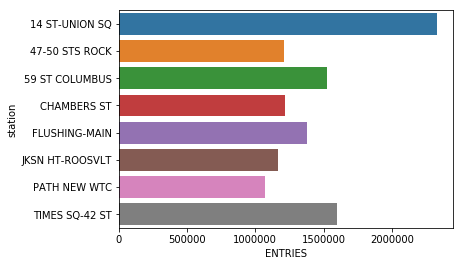

In [107]:
sns.barplot(x= tot["ENTRIES"], y=tot["station"]);

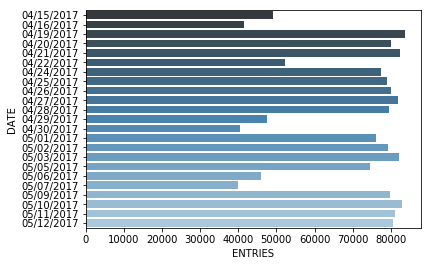

In [108]:
plotmystation('TIMES SQ-42 ST')

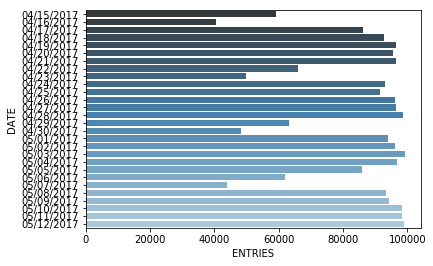

In [109]:
plotmystation('14 ST-UNION SQ')

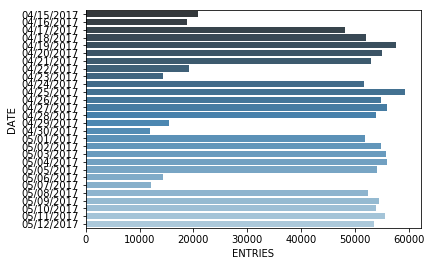

In [110]:
plotmystation('47-50 STS ROCK')

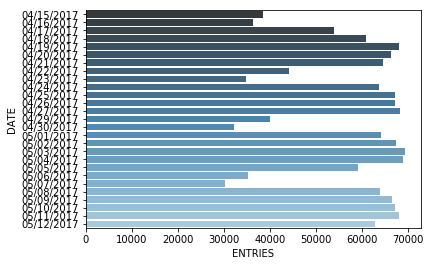

In [111]:
plotmystation('59 ST COLUMBUS')

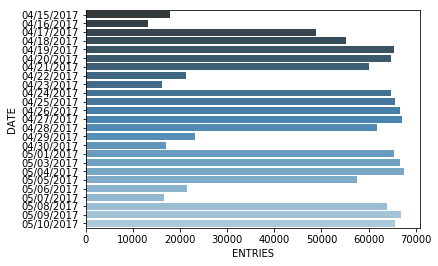

In [112]:
plotmystation('CHAMBERS ST')

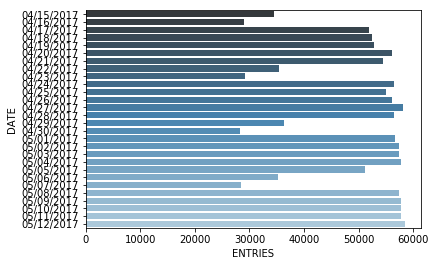

In [113]:
plotmystation('FLUSHING-MAIN')

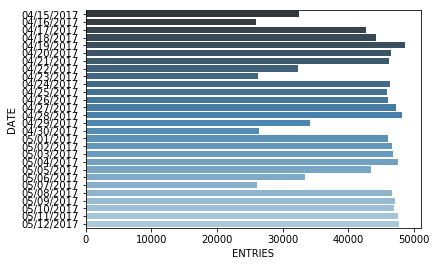

In [114]:
plotmystation('JKSN HT-ROOSVLT')

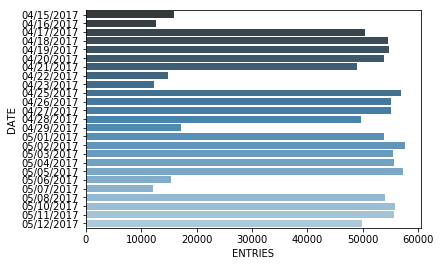

In [115]:
plotmystation('PATH NEW WTC')

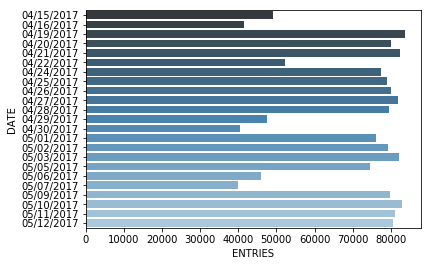

In [116]:
plotmystation('TIMES SQ-42 ST')

In [117]:
#load in the census data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 2)

In [119]:
#censusdata = pd.read_csv('uf_14_pers_web_b.txt', header = None)   

In [120]:
censusdata.to_string()

'      2101261014000200000000000000000000000032993210499999999999999 999999       9999999000250999999999999039500999999706003975000031420202878373745866901000000000000000000000000\n0      2102243034010203000000000000000000010031389999...                                                                                                                          \n1      2101128013000200000000000000000000000031409999...                                                                                                                          \n2      2102126043000200000000000000000000000032991199...                                                                                                                          \n3      2101265011000200000000000000000002000032993210...                                                                                                                          \n4      2102161021000200000000000000000001000031409999...                                           

In [121]:
#takes the total personal income numbers out of the raw data
def getincome(df):
    income = []
    for index, row in df.iterrows():
        person = df.iloc[index][0]
        income.append(person[115:122])
    return(income)
        

In [122]:
#takes the sub-borough number out of the raw data
def getsubborough(df):
    subborough = []
    for index, row in df.iterrows():
        person = df.iloc[index][0]
        subborough.append(person[146:148])
    return(subborough)

In [123]:
#takes the borough number out of the raw data
def getborough(df):
    borough = []
    for index, row in df.iterrows():
        person = df.iloc[index][0]
        borough.append(person[1])
    return(borough)

In [124]:
#takes the gender value out of the raw data
def getsex(df):
    sex = []
    for index, row in df.iterrows():
        person = df.iloc[index][0]
        sex.append(person[4])
    return(sex)

In [125]:
#takes the age value out of the raw data
def getage(df):
    age = []
    for index, row in df.iterrows():
        person = df.iloc[index][0]
        age.append(person[5:7])
    return(age)

In [126]:
#creates a data frame with the important stuff
cendf = pd.DataFrame({ 'Borough' : getborough(censusdata), \
                    'Sub-Borough' : getsubborough(censusdata), \
                    'Income' : getincome(censusdata), \
                    'Age' : getage(censusdata), \
                    'Sex' : getsex(censusdata)
                    })

In [127]:
#converts the elements of the data frame to numbers
cendf = cendf.convert_objects(convert_numeric=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [128]:
#removes all elements of the data frame where the income value = 9999999 which means NA
cendf2 = cendf[cendf['Income'] < 9999999]

In [129]:
#function that names each borough
def whatborough(df, borough):
    boroughdf = df[df['Borough'] == borough]
    return(boroughdf)

In [130]:
Bronx = whatborough(cleandf2, 1)

KeyError: 'Borough'

In [131]:
Brooklyn = whatborough(cleandf2, 2)

KeyError: 'Borough'

In [ ]:
Manhattan = whatborough(cleandf2, 3)

In [ ]:
Queens = whatborough(cleandf2, 4)

In [ ]:
StatenIsland = whatborough(cleandf2, 5)

In [ ]:
Manhattan.describe()

In [ ]:
def whatsubborough(df, subborough):
    subboroughdf = df[df['Sub-Borough'] == subborough]
    return(subboroughdf)

In [ ]:
plt.hist(Manhattan['Income'], bins = 'auto');
plt.xlim(0, 400000)

In [ ]:
plt.hist(Manhattan['Income'], bins = 'auto');
plt.xlim(800000, 1200000)
plt.ylim(0,100)

In [ ]:
SubMan1 = Manhattan.groupby(['Sub-Borough']).get_group(1)

In [ ]:
SubMan2 = Manhattan.groupby(['Sub-Borough']).get_group(2)

In [ ]:
SubMan3 = Manhattan.groupby(['Sub-Borough']).get_group(3)

In [ ]:
SubMan4 = Manhattan.groupby(['Sub-Borough']).get_group(4)

In [ ]:
SubMan5 = Manhattan.groupby(['Sub-Borough']).get_group(5)

In [ ]:
SubMan6 = Manhattan.groupby(['Sub-Borough']).get_group(6)

In [ ]:
SubMan7 = Manhattan.groupby(['Sub-Borough']).get_group(7)

In [ ]:
SubMan8 = Manhattan.groupby(['Sub-Borough']).get_group(8)

In [ ]:
SubMan9 = Manhattan.groupby(['Sub-Borough']).get_group(9)


In [ ]:
SubMan10 = Manhattan.groupby(['Sub-Borough']).get_group(10)

In [ ]:
SubMan1.describe()

In [ ]:
SubMan2.describe()

In [ ]:
SubMan3.describe()

In [ ]:
SubMan4.describe()

In [ ]:
SubMan5.describe()

In [ ]:
SubMan6.describe()

In [ ]:
SubMan7.describe()

In [ ]:
SubMan8.describe()

In [ ]:
SubMan9.describe()

In [ ]:
SubMan10.describe()

In [ ]:
plt.hist(SubMan1['Income'], bins = 'auto');
plt.xlim(0,1000000)

In [ ]:
plt.hist(SubMan2['Income'], bins = 'auto');
plt.xlim(0,150000)

In [ ]:
plt.hist(SubMan3['Income'], bins = 'auto');
plt.xlim(0,400000)

In [ ]:
plt.hist(SubMan4['Income'], bins = 'auto');
plt.xlim(0,400000)

In [ ]:
plt.hist(SubMan5['Income'], bins = 'auto');
plt.xlim(0,400000)

In [ ]:
plt.hist(SubMan6['Income'], bins = 'auto');
plt.xlim(0,400000)

In [ ]:
plt.hist(SubMan7['Income'], bins = 'auto');
plt.xlim(0,250000)

In [ ]:
plt.hist(SubMan8['Income'], bins = 'auto');
plt.xlim(0,200000)

In [ ]:
plt.hist(SubMan9['Income'], bins = 'auto');
plt.xlim(0,100000)

In [ ]:
plt.hist(SubMan10['Income'], bins = 'auto');
plt.xlim(0,200000)

In [ ]:
SubBrook1 = Brooklyn.groupby(['Sub-Borough']).get_group(2)

In [ ]:
plt.hist(SubBrook1['Income'], bins = 'auto');
plt.xlim(0,400000)

In [ ]:
subs = Manhattan.groupby(['Sub-Borough']).describe()

In [ ]:
sns.barplot(y = subs['Income']['mean'], x = subs['Income']['mean'].keys())

In [ ]:
sns.barplot(y = subs['Income']['50%'], x = subs['Income']['50%'].keys())